In [1]:
import numpy as np
import matplotlib.pyplot as plt
# coupling parameter selection

In [8]:
file_path = './log'
import os
files = os.listdir(file_path)

In [9]:
result = []
out_files = []
for file in files:
    if file.endswith('.out'):
        with open(os.path.join(file_path, file), 'r') as f:
            lines = f.readlines()
            if len(lines):
                line = lines[-1]
                print(line)
                result.append(line.split())
        out_files.append(file)
print(result)

   26         54795.2         2797.42         6951.69         1.50069          311.83         439.779  61

   19          101288         3775.31         13580.6         1.32254         369.904         520.378  55

   21         70185.8         3348.43         9990.94          1.3498         340.553         477.065  53

   63         13681.4         1039.98         2835.97         5.22592         59.1914         169.786  137

  129         6431.63         421.124         2522.09         13.6563         6.20842         99.9305  271

   40         27042.9          1741.7         3960.07         2.44324         167.489         288.759  89

   29         38013.2         2233.01         5214.18         1.83675         244.546         365.382  63

  112         10237.2         666.456         2599.48         7.13108         33.1257         137.163  241

   19         84635.2         3684.14         11276.4         1.30598         365.788         505.975  49

   34         33072.3         1991

In [15]:
model_misfit = []
data_misfit = []
data1_misfit = []
for iter in result:
    model_misfit.append(np.double(iter[4]))
    data_misfit.append(np.double(iter[2]))
    data1_misfit.append()

print(model_misfit, '\n', data_misfit)

[1.50069, 1.32254, 1.3498, 5.22592, 13.6563, 2.44324, 1.83675, 7.13108, 1.30598, 2.01068] 
 [2797.42, 3775.31, 3348.43, 1039.98, 421.124, 1741.7, 2233.01, 666.456, 3684.14, 1991.87]


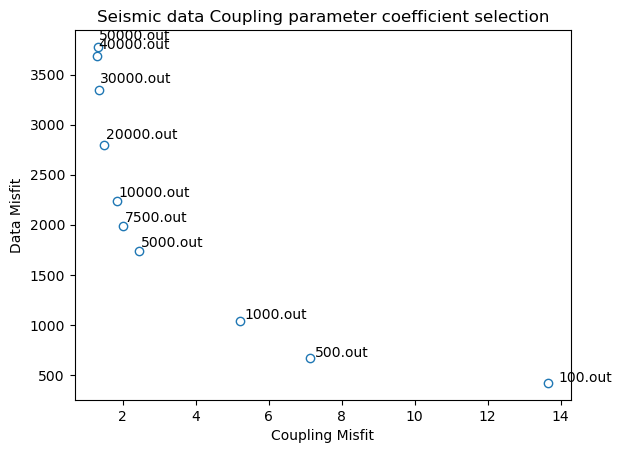

In [23]:
plt.figure()
plt.plot(model_misfit, data_misfit, marker='o', markerfacecolor='none', linestyle='none')
plt.xlabel('Coupling Misfit')
plt.ylabel('Data Misfit')
plt.title('Seismic data Coupling parameter coefficient selection')
tmp_iter = 0
for i,j in zip(model_misfit,data_misfit):
    plt.text(i*1.02,j*1.02,out_files[tmp_iter])
    tmp_iter = tmp_iter + 1
plt.show()

In [17]:
# generate colors
import matplotlib.pyplot as plt
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color=plt.cm.tab20.colors)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors = colors[:10]

In [18]:
labels = [s.rstrip('.out') for s in out_files]
double_array = np.array(list(map(float, labels)))
sorted_index = np.argsort(double_array)
print(double_array)
sorted_index

[20000. 50000. 30000.  1000.   100.  5000. 10000.   500. 40000.  7500.]


array([4, 7, 3, 5, 9, 6, 0, 2, 8, 1])

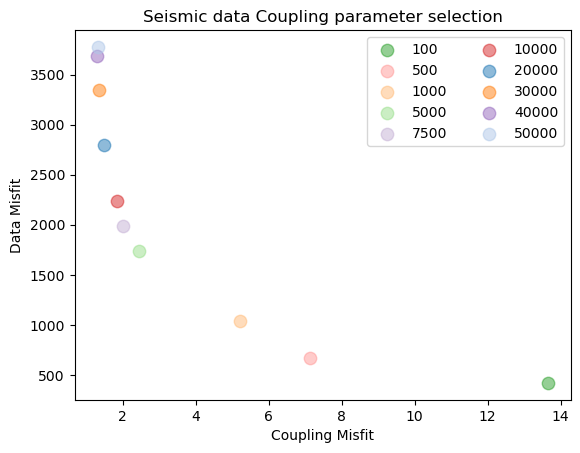

In [21]:
# Plot
plt.figure()
for iter in sorted_index:
    plt.scatter(model_misfit[iter], data_misfit[iter], alpha=0.5, color=colors[iter], label=labels[iter],s=80)
plt.legend(ncol=2)
plt.title('Seismic data Coupling parameter selection')
plt.xlabel('Coupling Misfit')
plt.ylabel('Data Misfit')
plt.show()